
# **Energy Consumption Data Analysis**

## Description
Using advanced data analysis methods to examine energy consumption patterns, identify optimization opportunities, and recommend strategies to improve energy efficiency.

## Interest
Contributing to the promotion of energy efficiency and the reduction of energy costs for businesses and households.

## Motivation
Energy efficiency is crucial both economically and environmentally, allowing for significant savings and a reduced carbon footprint.

## Tools
Excellent command of Python, R, Pandas, Matplotlib, and Tableau for data visualization and communicating results to stakeholders.


In [56]:
import pandas as pd
import os
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler

from sklearn.cluster import KMeans
import requests


### Loading the energy consumption data

To fetch data directly from Kaggle using their API, we need to follow a different approach than simply using requests.get with a URL. Kaggle requires authentication and uses its API to access datasets programmatically. 

1. Install Kaggle API:

First, we need to install the Kaggle API client using pip:

In [24]:

pip install kaggle


     ---------------------------------------- 0.0/82.1 kB ? eta -:--:--
     --------- ---------------------------- 20.5/82.1 kB 682.7 kB/s eta 0:00:01
     -------------- ----------------------- 30.7/82.1 kB 435.7 kB/s eta 0:00:01
     ------------------ ------------------- 41.0/82.1 kB 326.8 kB/s eta 0:00:01
     ----------------------- -------------- 51.2/82.1 kB 327.7 kB/s eta 0:00:01
     ----------------------- -------------- 51.2/82.1 kB 327.7 kB/s eta 0:00:01
     ---------------------------- --------- 61.4/82.1 kB 218.8 kB/s eta 0:00:01
     -------------------------------------- 82.1/82.1 kB 271.2 kB/s eta 0:00:00
  Preparing metadata (setup.py): started
  Preparing metadata (setup.py): finished with status 'done'
  Obtaining dependency information for certifi>=2023.7.22 from https://files.pythonhosted.org/packages/5b/11/1e78951465b4a225519b8c3ad29769c49e0d8d157a070f681d5b6d64737f/certifi-2024.6.2-py3-none-any.whl.metadata
  Using cached certifi-2024.6.2-py3-none-any.whl.meta

ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
transformers 2.1.1 requires sentencepiece, which is not installed.

[notice] A new release of pip is available: 23.2.1 -> 24.1.1
[notice] To update, run: python.exe -m pip install --upgrade pip


***Note: Ensure you have set up the necessary credentials (kaggle.json file) and Place your kaggle.json file in the ~/.kaggle/ directory.***

In [38]:

# Get the current directory
current_dir = os.getcwd()
file_dir = os.path.join(current_dir, "energy_dataset")

# Ensure the download directory exists
if not os.path.exists(file_dir):
    os.makedirs(file_dir)

# Define the dataset identifier (not the full URL)
dataset_identifier = "pranjalverma08/energy-dataset-countrywise-19002021"

# Use Kaggle API to download the dataset
command = f'kaggle datasets download -d {dataset_identifier} -p {file_dir} --unzip'
print(f"Executing command: {command}")

result = os.system(command)

# Check the result of the command
if result == 0:
    print("Dataset downloaded and unzipped successfully.")
else:
    print("An error occurred while downloading the dataset.")


Executing command: kaggle datasets download -d pranjalverma08/energy-dataset-countrywise-19002021 -p C:\Users\denis\Downloads\energy_dataset --unzip
Dataset downloaded and unzipped successfully.


### Selecting the country we want to work on

In [80]:
# Ask for the country name
country = input("Please enter the country name: ")


# Define the file name based on the country
country_dir = os.path.join(file_dir, f"{country}_energy_data.csv")


# Load the dataset into a pandas DataFrame
country_energy_data = pd.read_csv(country_dir)

# Display the first few rows of the dataset
country_energy_data.head()


Please enter the country name: Algeria


,iso_code,country,year,coal_prod_change_pct,coal_prod_change_twh,gas_prod_change_pct,gas_prod_change_twh,oil_prod_change_pct,oil_prod_change_twh,energy_cons_change_pct,...,solar_consumption,solar_elec_per_capita,solar_energy_per_capita,wind_share_elec,wind_cons_change_pct,wind_share_energy,wind_cons_change_twh,wind_consumption,wind_elec_per_capita,wind_energy_per_capita
0,DZA,Algeria,1900,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,DZA,Algeria,1901,NaN,0.0,NaN,0.0,NaN,0.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,DZA,Algeria,1902,NaN,0.0,NaN,0.0,NaN,0.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,DZA,Algeria,1903,NaN,0.0,NaN,0.0,NaN,0.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,DZA,Algeria,1904,NaN,0.0,NaN,0.0,NaN,0.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


### Exploratory Data Analysis (EDA)

In [84]:

# Summary statistics
country_energy_data.describe()


,year,coal_prod_change_pct,coal_prod_change_twh,gas_prod_change_pct,gas_prod_change_twh,oil_prod_change_pct,oil_prod_change_twh,energy_cons_change_pct,energy_cons_change_twh,biofuel_share_elec,...,solar_consumption,solar_elec_per_capita,solar_energy_per_capita,wind_share_elec,wind_cons_change_pct,wind_share_energy,wind_cons_change_twh,wind_consumption,wind_elec_per_capita,wind_energy_per_capita
count,121.000000,82.000000,116.000000,74.000000,120.000000,88.000000,120.000000,55.000000,55.000000,21.0,...,56.000000,56.000000,56.000000,36.000000,6.000000,56.000000,55.000000,56.000000,56.000000,56.000000
mean,1960.000000,9.428061,0.000017,12.443068,6.788058,39.731375,5.582225,6.381364,11.158818,0.0,...,0.123054,1.146321,2.920946,0.003611,286.591500,0.000625,0.000382,0.003875,0.038964,0.093196
std,35.073732,58.703909,0.140933,30.159797,27.997147,226.654205,35.568411,8.124761,17.891103,0.0,...,0.379807,3.931496,8.911972,0.009631,736.278908,0.001959,0.007033,0.011855,0.130463,0.288476
min,1900.000000,-100.000000,-0.676000,-30.965000,-71.432000,-100.000000,-133.929000,-8.149000,-56.646000,0.0,...,0.000000,0.000000,0.000000,0.000000,-47.661000,0.000000,-0.023000,0.000000,0.000000,0.000000
25%,1930.000000,-16.360750,-0.008000,1.059250,0.000000,-3.018500,-0.165500,1.212500,3.053000,0.0,...,0.000000,0.000000,0.000000,0.000000,-15.366500,0.000000,0.000000,0.000000,0.000000,0.000000
50%,1960.000000,0.000000,0.000000,4.354000,0.000000,0.000000,0.000000,5.449000,10.865000,0.0,...,0.000000,0.000000,0.000000,0.000000,-0.653500,0.000000,0.000000,0.000000,0.000000,0.000000
75%,1990.000000,19.762000,0.018750,12.823000,9.100250,7.283500,13.468500,9.399500,23.025000,0.0,...,0.000000,0.000000,0.000000,0.000000,-0.351750,0.000000,0.000000,0.000000,0.000000,0.000000
max,2020.000000,325.001000,0.554000,197.886000,100.693000,1942.857000,150.362000,31.038000,48.616000,0.0,...,1.523000,15.794000,35.490000,0.045000,1789.039000,0.008000,0.046000,0.048000,0.740000,1.210000


In [85]:

# Obtenir les statistiques descriptives
desc = country_energy_data.describe()

# Trouver les colonnes avec des valeurs NaN après le premier index
cols_to_drop = desc.columns[desc[1:].isna().any()]
#cols_to_drop

# Supprimer ces colonnes du DataFrame original
country_energy_data_cleaned = country_energy_data.drop(columns=cols_to_drop)


In [86]:
pd.DataFrame(country_energy_data_cleaned.columns)

,0
0,iso_code
1,country
2,year
3,coal_prod_change_pct
4,coal_prod_change_twh
...,...
116,wind_share_energy
117,wind_cons_change_twh
118,wind_consumption
119,wind_elec_per_capita


In [87]:

# Checking for missing values
country_energy_data_cleaned.isnull().sum()


iso_code                   0
country                    0
year                       0
coal_prod_change_pct      39
coal_prod_change_twh       5
                          ..
wind_share_energy         65
wind_cons_change_twh      66
wind_consumption          65
wind_elec_per_capita      65
wind_energy_per_capita    65
Length: 121, dtype: int64

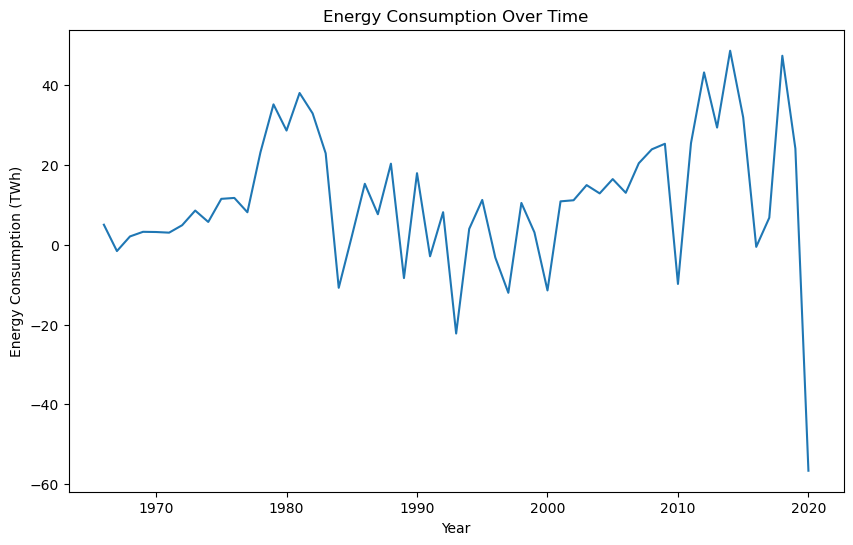

In [88]:
# Visualizing energy consumption over time
plt.figure(figsize=(10, 6))
plt.plot(country_energy_data_cleaned['year'], country_energy_data_cleaned['energy_cons_change_twh'])  # Use the appropriate column
plt.title('Energy Consumption Over Time')
plt.xlabel('Year')
plt.ylabel('Energy Consumption (TWh)')
plt.show()


### Advanced Analysis

C:\Users\denis\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\denis\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


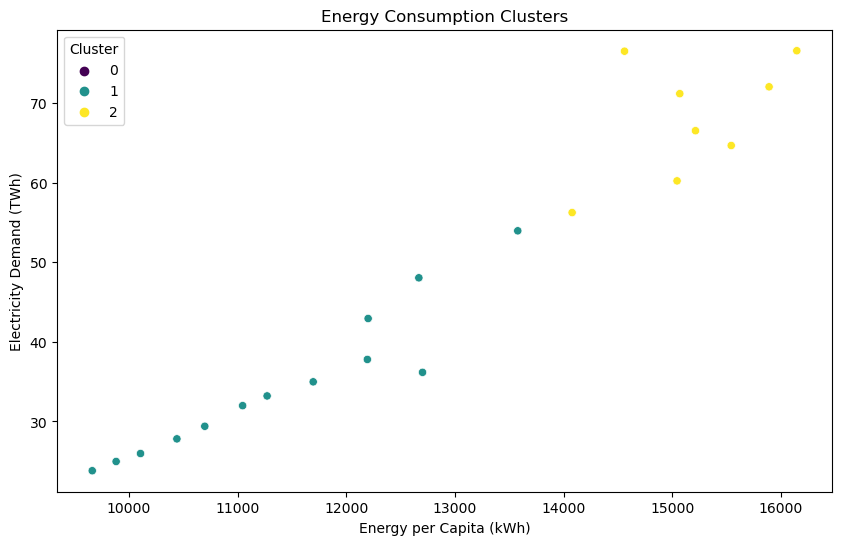

In [91]:
import pandas as pd
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import seaborn as sns

# Select relevant features for clustering
features = country_energy_data_cleaned[['energy_per_capita', 'electricity_demand', 'fossil_share_energy']]

# Fill or drop missing values
features = features.fillna(features.mean())  # Fill with mean values

# Scale the features
scaler = StandardScaler()
scaled_features = scaler.fit_transform(features)

# Applying KMeans clustering
kmeans = KMeans(n_clusters=3, random_state=42)
kmeans.fit(scaled_features)
country_energy_data_cleaned['Cluster'] = kmeans.labels_

# Visualizing the clusters
plt.figure(figsize=(10, 6))
sns.scatterplot(x='energy_per_capita', y='electricity_demand', hue='Cluster', data=country_energy_data_cleaned, palette='viridis')
plt.title('Energy Consumption Clusters')
plt.xlabel('Energy per Capita (kWh)')
plt.ylabel('Electricity Demand (TWh)')
plt.show()

In [61]:
print(features.isnull().sum())

energy_per_capita       0
electricity_demand      0
fossil_share_energy    41
dtype: int64
